### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
path = os.getcwd()
path = path + '/data/track_features/tf_mini.csv'


df_track = pd.read_csv('./data/tf_mini.csv')
df_logs = pd.read_csv('./data/log_mini.csv')

pd.set_option('display.max_columns', None)

df_track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [3]:
df_track.shape

(50704, 30)

In [4]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [5]:
df_track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [6]:
df_track.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,5.070400e+04,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,7.058671e-02,5.269111,0.205520,-7.519316,0.547603,0.391874,0.122998,121.576396,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,2.142261e-01,3.597578,0.176486,3.927858,0.223803,0.207116,0.136022,29.786741,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,1.084167e-08,2.000000,0.098249,-8.942000,0.366652,0.225742,0.038028,97.158997,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,2.211650e-06,5.000000,0.131403,-6.688000,0.571023,0.364057,0.061794,120.115498,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,7.654784e-04,8.000000,0.262823,-5.043000,0.729537,0.533131,0.160202,141.014008,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


#### Lets explore each columns further in

The min duration: 30.013330459594727
The max duration: 1787.760986328125


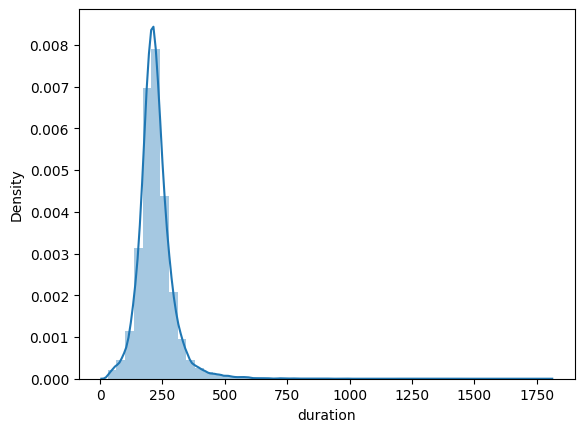

In [7]:
print('The min duration: {}'.format(df_track['duration'].min()))
print('The max duration: {}'.format(df_track['duration'].max()))

sns.distplot(df_track['duration'])
plt.show()

In [8]:
df_track['duration'].describe()

count    50704.000000
mean       222.267980
std         72.224839
min         30.013330
25%        183.933334
50%        214.866669
75%        250.426666
max       1787.760986
Name: duration, dtype: float64

In [9]:
df_track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [10]:
# There are no duplicates here
df_track['track_id'].value_counts().shape[0] == df_track['track_id'].nunique()

True

In [11]:
#Converting the max track duration in miniutes
df_track['duration'].max() * 0.0166667


29.79607603083496

#### 29 mins for a song track. Maybe its a podcast

In [12]:
df_track[df_track['track_id'] == 't_a540e552-16d4-42f8-a185-232bd650ea7d']

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.45804,0.519497,0.504949,0.399767,7.51188,0.817709,0.903753,0.000003,0,0.132124,-11.238,0.3861,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.02858,0.349438,0.832467,-0.213871,-0.299464,-0.675907


In [13]:
# Checking the same track id in logs df

df_logs[df_logs['track_id_clean'] == 't_a540e552-16d4-42f8-a185-232bd650ea7d']

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
163671,0_0e4a49d8-688d-4958-94db-5cb56adc3090,10,10,t_a540e552-16d4-42f8-a185-232bd650ea7d,False,False,False,False,0,1,0,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone


In [14]:
df_logs.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

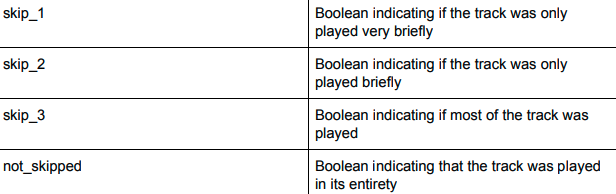

In [15]:
def get_skip_stats(df_logs):

    cols = ['skip_1','skip_2','skip_3','not_skipped']

    for col in cols:
        print("% of data in each category for {} column".format(col))
        print(df_logs[col].value_counts(normalize=True).reset_index().T)
        print('-------------------------------')


get_skip_stats(df_logs)

% of data in each category for skip_1 column
               0         1
index      False      True
skip_1  0.578497  0.421503
-------------------------------
% of data in each category for skip_2 column
               0         1
index       True     False
skip_2  0.517179  0.482821
-------------------------------
% of data in each category for skip_3 column
              0        1
index      True    False
skip_3  0.64838  0.35162
-------------------------------
% of data in each category for not_skipped column
                    0         1
index           False      True
not_skipped  0.667119  0.332881
-------------------------------


#### Let us choose the skip_2 as there are almost equal number of % in each category. 

In [16]:
df_logs['session_id'].value_counts()

0_00006f66-33e5-4de7-a324-2d18e439fc1e    20
0_08317754-b299-481b-ae44-e74b4b232ac2    20
0_0821a0cd-2a85-4ceb-8c11-a1a4748e74d8    20
0_08202dbe-7375-49eb-a793-2d1579fb3afd    20
0_081fc470-cea4-4a3f-a238-22099654c153    20
                                          ..
0_088b55d4-9da8-4237-91f0-5579d811986b    10
0_030d00a4-de73-4697-a1a6-b765e231f80d    10
0_0d207bfd-43fe-4b1e-8c8f-736536555140    10
0_030ea191-5c2c-45ae-8ae7-a1875adabe86    10
0_084483a5-5562-4305-bc68-5687110700f5    10
Name: session_id, Length: 10000, dtype: int64

In [17]:
df_logs[df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b'].sort_values(by='track_id_clean')

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98270,0_088b55d4-9da8-4237-91f0-5579d811986b,1,10,t_3a5c2332-9fe3-4721-8744-be15967d7dd8,False,True,True,False,0,0,0,0,0,0,False,13,2018-07-15,True,catalog,clickrow,endplay
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,True,True,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn
98271,0_088b55d4-9da8-4237-91f0-5579d811986b,2,10,t_66173dc5-6f73-4514-b904-70e6c0011eae,False,False,False,True,1,1,0,0,0,0,False,13,2018-07-15,True,catalog,clickrow,trackdone
98275,0_088b55d4-9da8-4237-91f0-5579d811986b,6,10,t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2,False,True,True,False,0,0,1,1,0,1,False,13,2018-07-15,True,catalog,trackdone,backbtn
98277,0_088b55d4-9da8-4237-91f0-5579d811986b,8,10,t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2,False,True,True,False,0,1,0,0,0,1,False,13,2018-07-15,True,catalog,trackdone,backbtn
98273,0_088b55d4-9da8-4237-91f0-5579d811986b,4,10,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,False,False,True,1,1,0,0,0,0,False,13,2018-07-15,True,catalog,clickrow,trackdone
98279,0_088b55d4-9da8-4237-91f0-5579d811986b,10,10,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98272,0_088b55d4-9da8-4237-91f0-5579d811986b,3,10,t_e4dea389-5cad-42be-ac8b-e8bca670738d,False,True,True,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,endplay


In [18]:
df_logs[df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b']['track_id_clean'].value_counts()

t_5718ab08-3a15-4d3f-9e63-42b2f6805e31    3
t_bacf06d3-9185-4183-84ea-ff0db51475ce    2
t_ab55b9b5-3a1a-46a4-b58a-1c29136a08e2    2
t_3a5c2332-9fe3-4721-8744-be15967d7dd8    1
t_66173dc5-6f73-4514-b904-70e6c0011eae    1
t_e4dea389-5cad-42be-ac8b-e8bca670738d    1
Name: track_id_clean, dtype: int64

Lets check the status(skip_2) of tracks 

In [19]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','skip_2']].value_counts().reset_index()

,track_id_clean,skip_2,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,480
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,435


status(skip_3) of the track

In [20]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','skip_3']].value_counts().reset_index()

,track_id_clean,skip_3,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,579
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,336


In [21]:
df_logs[df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][['track_id_clean','not_skipped']].value_counts().reset_index()

,track_id_clean,not_skipped,0
0,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,584
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,331


#### What about tracks which are being played in a certain session mutiple times?

In [22]:
df_logs[(df_logs['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b') & (df_logs['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31')]

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,True,True,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn


Lets finalize the target column and see how it looks like overall

In [23]:
df_logs_mod = df_logs.copy()

df_logs_mod.drop(columns=['skip_1','not_skipped','skip_3'], axis = 1, inplace=True)

In [24]:
df_logs_mod[(df_logs_mod['session_id'] == '0_088b55d4-9da8-4237-91f0-5579d811986b') & (df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31')]

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
98274,0_088b55d4-9da8-4237-91f0-5579d811986b,5,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,trackdone,trackdone
98276,0_088b55d4-9da8-4237-91f0-5579d811986b,7,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,trackdone
98278,0_088b55d4-9da8-4237-91f0-5579d811986b,9,10,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,13,2018-07-15,True,catalog,backbtn,backbtn


In [25]:
df_logs['context_type'].value_counts()

user_collection          67430
catalog                  38263
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

In [26]:
df_logs['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

In [27]:
df_logs['hist_user_behavior_reason_end'].value_counts()

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13129
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64

<Axes: xlabel='index', ylabel='hour_of_day'>

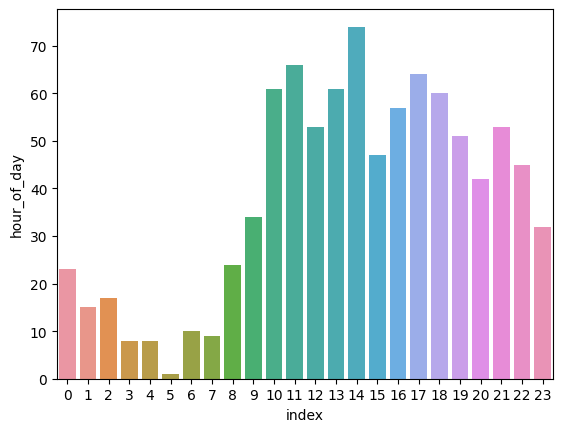

In [28]:
df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()

sns.barplot(data=df_logs_mod,
         x=df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()['index'],
         y=df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31']['hour_of_day'].value_counts().reset_index()['hour_of_day']
        )

In [29]:
cols = ['track_id_clean','skip_2', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

df_logs_mod[df_logs_mod['track_id_clean'] == 't_5718ab08-3a15-4d3f-9e63-42b2f6805e31'][cols].drop_duplicates().head(10)

,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
92,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,8,2018-07-15,True,catalog,clickrow,trackdone
311,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,0,1,1,0,2,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
315,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,11,2018-07-15,True,editorial_playlist,trackdone,fwdbtn
319,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,11,2018-07-15,True,editorial_playlist,backbtn,backbtn
321,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,2,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
325,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,1,False,11,2018-07-15,True,editorial_playlist,trackdone,backbtn
478,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,1,1,0,0,0,0,False,10,2018-07-15,True,editorial_playlist,clickrow,trackdone
570,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,True,0,1,0,0,0,0,False,22,2018-07-14,True,charts,fwdbtn,fwdbtn
660,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,9,2018-07-15,True,editorial_playlist,fwdbtn,trackdone
756,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,False,0,1,0,0,0,0,False,14,2018-07-15,True,editorial_playlist,fwdbtn,trackdone


In [30]:
df_logs_mod = df_logs_mod[cols].drop_duplicates()

In [31]:
cols = ['track_id','target','context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play','hist_user_behavior_n_seekfwd',
        'hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end']

In [32]:
df_logs_mod.columns = cols

In [33]:
df_logs_mod.head()

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


## Exploratory Data Analysis

#### Univariate Analysis

In [34]:
def plot_histogram(df):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.distplot(df,bins=30,kde=False,color='red')


def plot_countplot(df, hue = None):
    """ To plot bargraph to get the count of each score feature"""
    # print(df.describe())
    plt.figure(figsize=(8,4))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(x = df, hue = hue)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(10,6))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)

In [35]:
df_logs_mod.head()

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


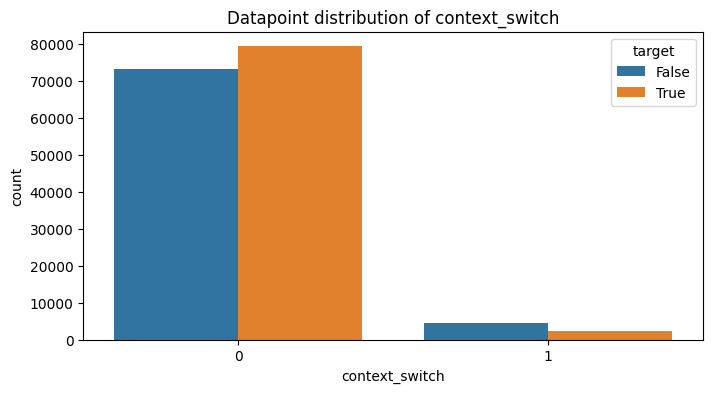

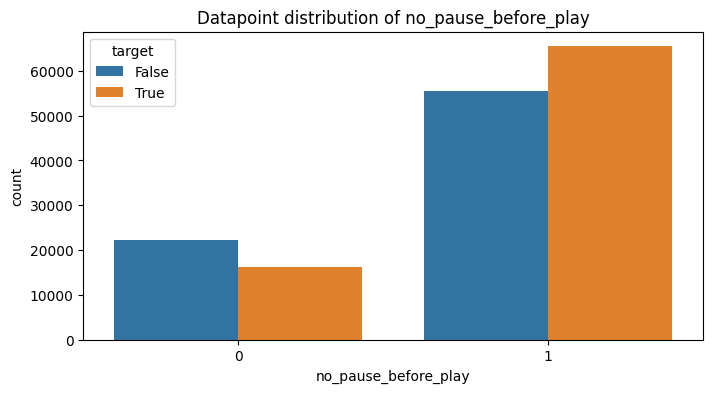

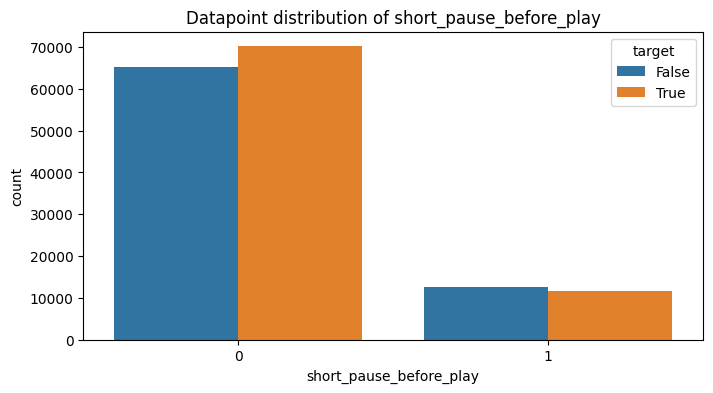

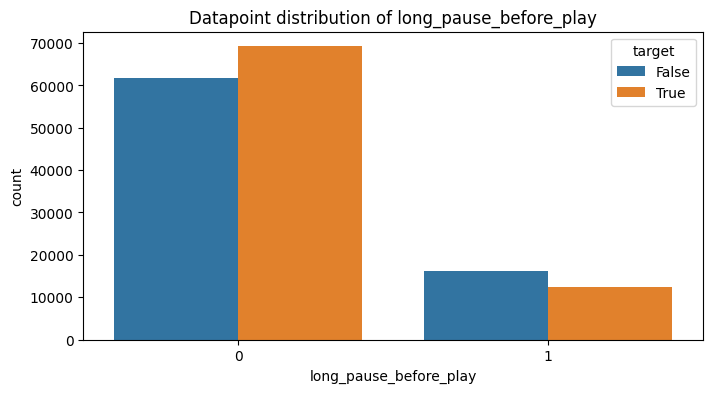

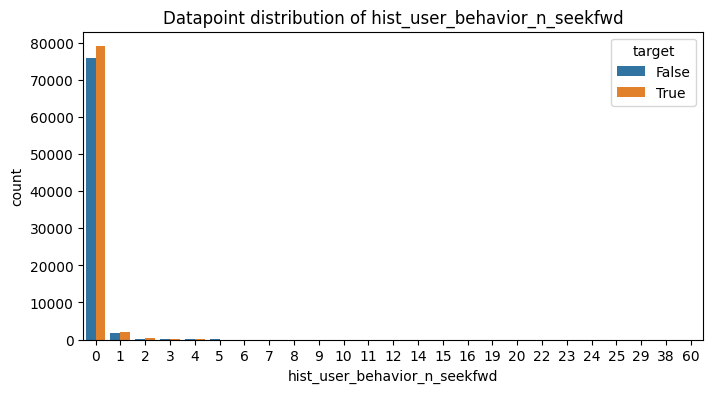

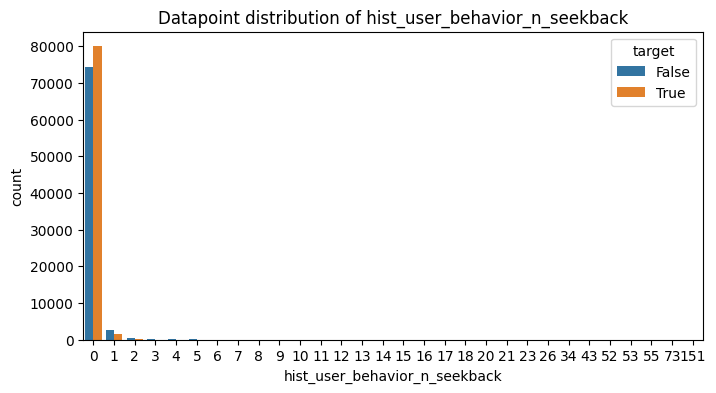

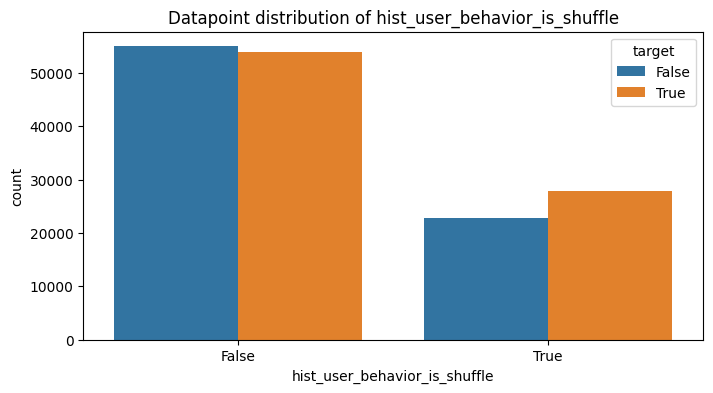

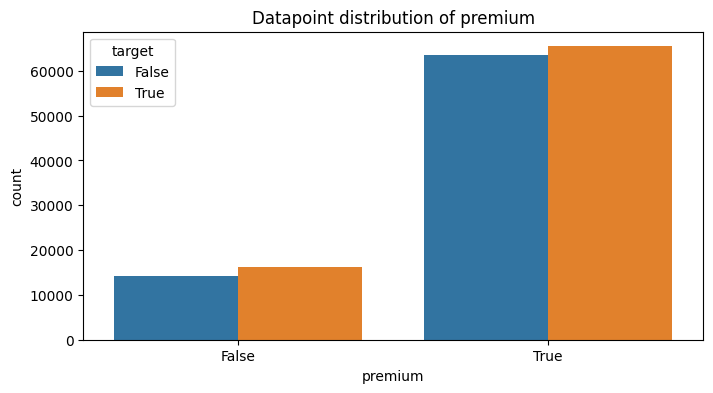

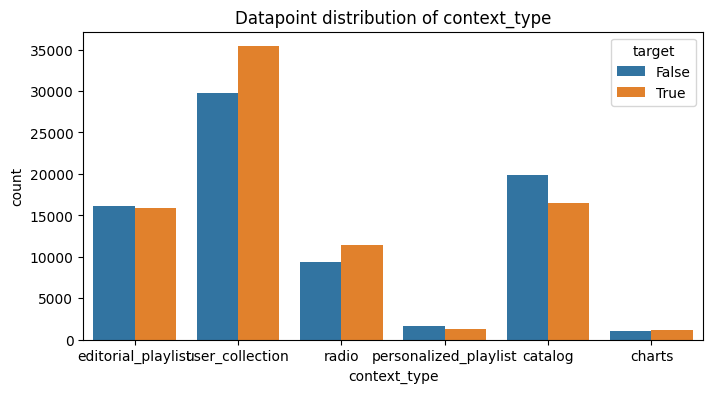

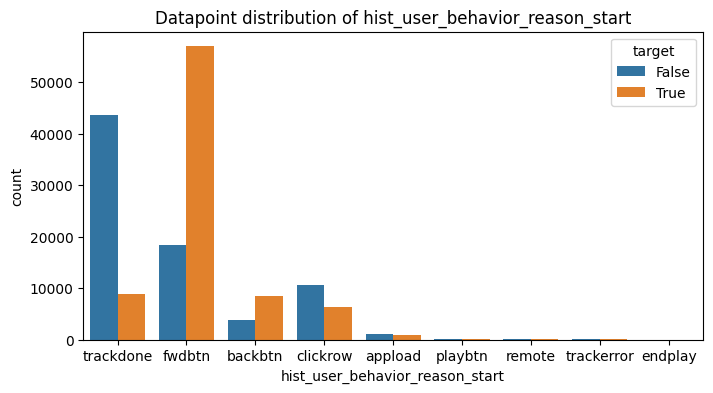

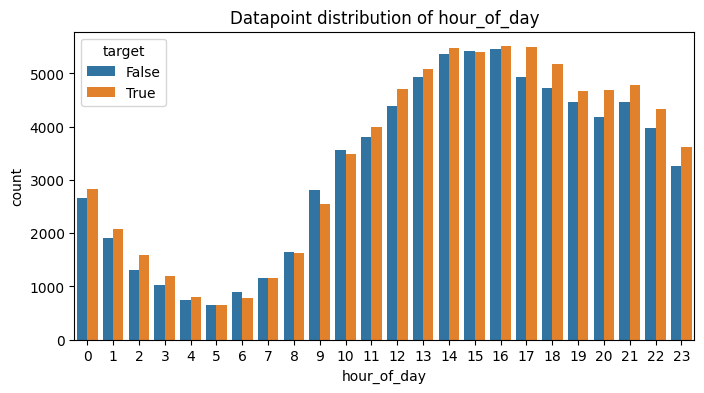

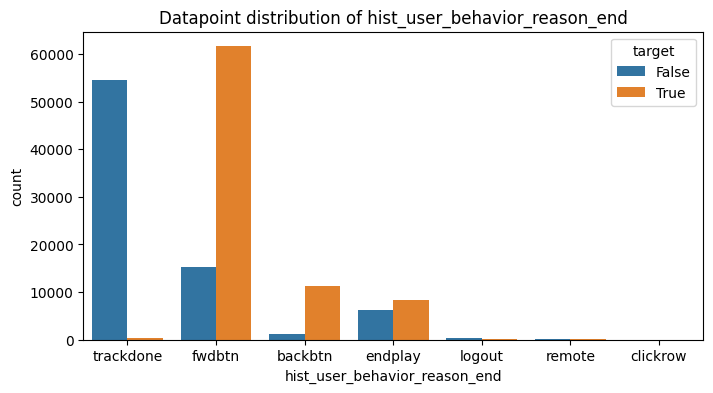

In [36]:
cols = ['context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle','premium',
       'context_type', 'hist_user_behavior_reason_start','hour_of_day',
       'hist_user_behavior_reason_end']


for col in cols:
    plot_countplot(df_logs_mod[col], hue=df_logs_mod['target'])


1. User action which led to track end is mostly beacuse of forward and backward button press.
2. User action which led to track start is mostly beacuse of trackdone
3. Seeking forward and backward has very little impact on the target variable.
4. The skipping ratio for premium and non-premium seems to be same
5. The skipping ratio does vary by hour, but the user tend to listen during the afternoon the most.


In [37]:
# Feature Engineering done for the date column

df_logs_mod['month'] = pd.to_datetime(df_logs_mod['date']).dt.month
df_logs_mod['year'] = pd.to_datetime(df_logs_mod['date']).dt.year
df_logs_mod['day_of_week'] = pd.to_datetime(df_logs_mod['date']).dt.day_of_week


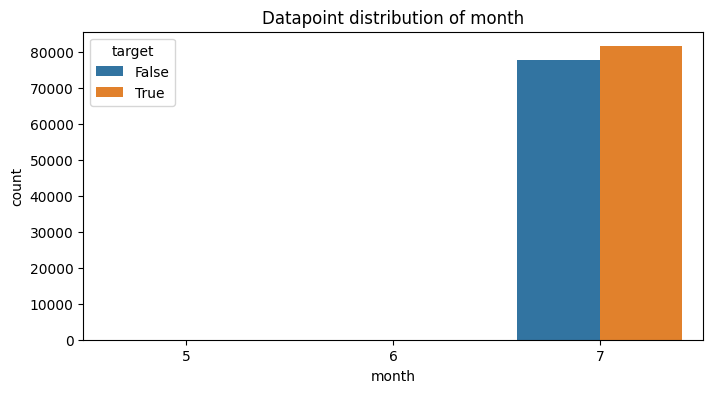

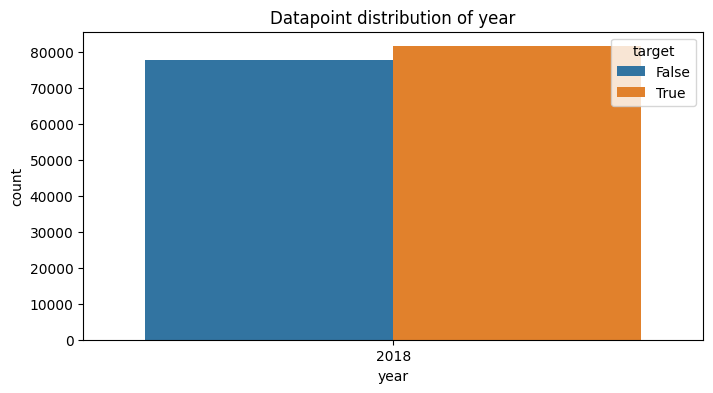

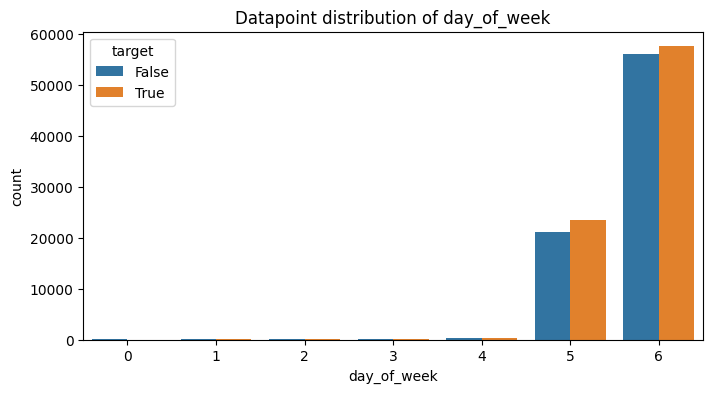

In [38]:
cols = ['month','year','day_of_week']

for col in cols:
    plot_countplot(df_logs_mod[col], hue=df_logs_mod['target'])

1. There is only one year of data and that also for the month of July, No useful information here.
2. One interesting fact is that users listen to spotify mostly during weekend (Saturday and Sunday)

### Bi-Variate Analysis

In [39]:
df_logs_mod['year']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
167875    2018
167876    2018
167877    2018
167878    2018
167879    2018
Name: year, Length: 159445, dtype: int64

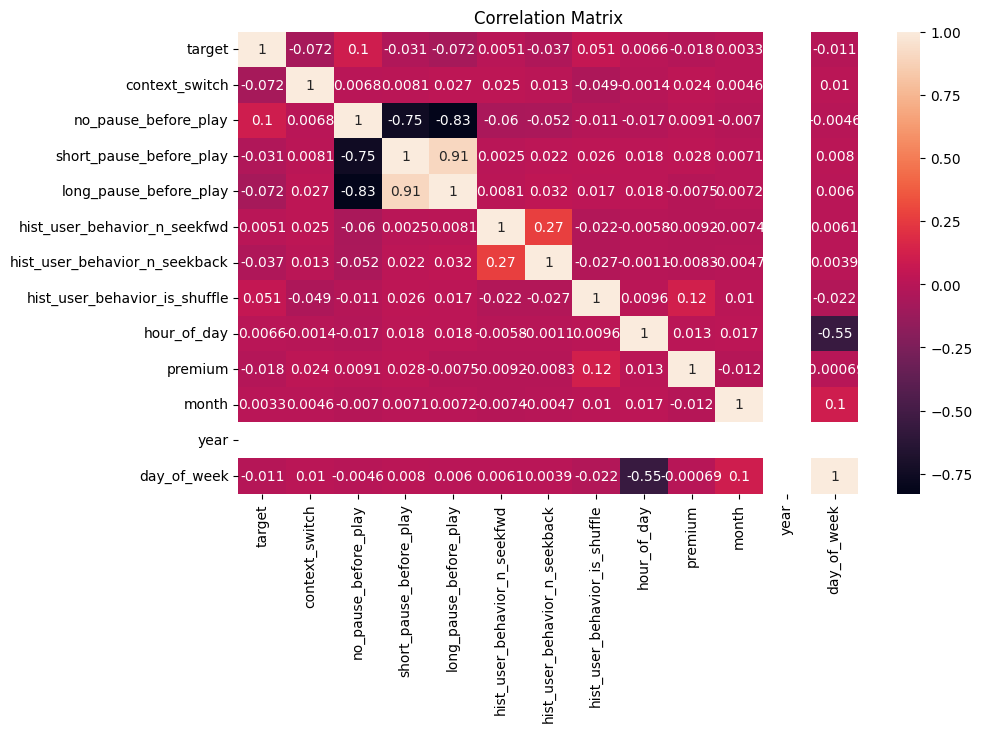

In [40]:
plot_heatmap(df_logs_mod)

1. Number of pauses before play seems to be an important factor for skipping as it is comparatively high correlation with target
2. Some of the Negative Correlation with target are: Context_Switch, short pause before play, long pause before play. (These column can be dropped)

In [41]:
df_logs_mod['track_id'].value_counts()

t_bacf06d3-9185-4183-84ea-ff0db51475ce    1176
t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0     676
t_5718ab08-3a15-4d3f-9e63-42b2f6805e31     661
t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5     542
t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a     524
                                          ... 
t_d21a5d29-e829-46c3-b5d7-28443cc05a1a       1
t_9f276e03-7fed-480b-9c90-ce315f3e3b81       1
t_4459b7de-db90-4622-9ed6-03e95f58f693       1
t_8b51ec07-c488-441d-8163-a6c495ebc1bc       1
t_76cb529c-86e9-41e2-a136-f5bd97481a9a       1
Name: track_id, Length: 50704, dtype: int64

In [42]:
df_logs_mod[df_logs_mod['track_id'] == 't_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a']

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,month,year,day_of_week
253,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,True,0,1,0,0,0,0,True,23,2018-07-14,True,charts,fwdbtn,backbtn,7,2018,5
317,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,True,0,1,0,0,0,1,False,11,2018-07-15,True,editorial_playlist,fwdbtn,backbtn,7,2018,6
477,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,0,0,1,1,0,0,False,10,2018-07-15,True,editorial_playlist,fwdbtn,endplay,7,2018,6
662,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,0,0,1,1,0,0,False,10,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6
758,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,0,1,0,0,0,0,False,14,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,7,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166391,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,0,0,1,1,0,0,True,22,2018-07-14,True,editorial_playlist,trackdone,fwdbtn,7,2018,5
166475,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,0,0,1,1,0,0,False,13,2018-07-15,True,charts,trackdone,fwdbtn,7,2018,6
166786,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,True,0,0,1,1,0,0,False,19,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,7,2018,6
166870,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,True,0,1,0,0,0,0,False,13,2018-07-15,False,radio,backbtn,backbtn,7,2018,6


## Model Building

### Baseline Model: Logistic Regression

In [43]:
df_logs_mod.head()

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,month,year,day_of_week
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,7,2018,6


In [44]:
# Drop the features that are not required for model.
cols = ['hour_of_day','date','month','year','day_of_week']

df_logs_mod.drop(columns=cols, axis=1, inplace=True)

In [45]:
df_logs_mod.head()

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,0,0,0,0,0,0,True,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,0,1,0,0,0,0,True,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,0,1,0,0,0,0,True,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,0,1,0,0,0,0,True,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,0,1,0,0,0,0,True,True,editorial_playlist,trackdone,trackdone


In [46]:
def transform_boolean(df):

    if df == True:
        return 1
    else:
        return 0

cols = ['target','hist_user_behavior_is_shuffle','premium']

for items in cols:
    df_logs_mod[items] = df_logs_mod[items].apply(transform_boolean)



In [47]:
df_logs_mod['context_type'].unique()

array(['editorial_playlist', 'user_collection', 'radio',
       'personalized_playlist', 'catalog', 'charts'], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_logs_mod['track_id'] = le.fit_transform(df_logs_mod['track_id'])

In [49]:
df_logs_mod['context_type'] = le.fit_transform(df_logs_mod['context_type'])
df_logs_mod['hist_user_behavior_reason_start'] = le.fit_transform(df_logs_mod['hist_user_behavior_reason_start'])
df_logs_mod['hist_user_behavior_reason_end'] = le.fit_transform(df_logs_mod['hist_user_behavior_reason_end'])

In [50]:
df_logs_mod

,track_id,target,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,890,0,0,0,0,0,0,0,1,1,2,7,6
1,28794,0,0,1,0,0,0,0,1,1,2,7,6
2,49953,0,0,1,0,0,0,0,1,1,2,7,6
3,7133,0,0,1,0,0,0,0,1,1,2,7,6
4,20100,0,0,1,0,0,0,0,1,1,2,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,10728,0,0,1,0,0,0,0,0,1,5,7,6
167876,33884,0,0,1,0,0,0,0,0,1,5,7,6
167877,48781,0,0,1,0,0,0,0,0,1,5,7,6
167878,44710,0,0,1,0,0,0,0,0,1,5,7,6


In [51]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

# Lets scale the data, standardization 
from sklearn.preprocessing import StandardScaler

In [52]:
X = df_logs_mod.drop('target', axis= 1)
y = df_logs_mod['target']


#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (111611, 12)
The dimension of X_test is (47834, 12)


In [53]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [54]:
w0 = log.intercept_
w = log.coef_[0]

Coef_df = pd.DataFrame({'Columns': X.columns, 'Coef_': w})
print('Coefficient and Intercept for Logistic Regression')
print(f'Intercept_: {w0}')
Coef_df

Coefficient and Intercept for Logistic Regression
Intercept_: [-0.17807565]


,Columns,Coef_
0,track_id,-0.005881
1,context_switch,-0.402882
2,no_pause_before_play,0.591371
3,short_pause_before_play,0.353459
4,long_pause_before_play,-0.099701
5,hist_user_behavior_n_seekfwd,0.055904
6,hist_user_behavior_n_seekback,-1.774341
7,hist_user_behavior_is_shuffle,0.198864
8,premium,-0.077738
9,context_type,0.165894


In [55]:
predict_log=log.predict(X_test)

In [56]:
print('\t  CLASSIFICATION REPORT- Logistic Regression')
print(classification_report(y_test,predict_log))

	  CLASSIFICATION REPORT- Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     23358
           1       0.82      0.93      0.87     24476

    accuracy                           0.86     47834
   macro avg       0.87      0.86      0.86     47834
weighted avg       0.86      0.86      0.86     47834



Text(0.5, 1.0, 'Confusion Matrix-Logistic Regression')

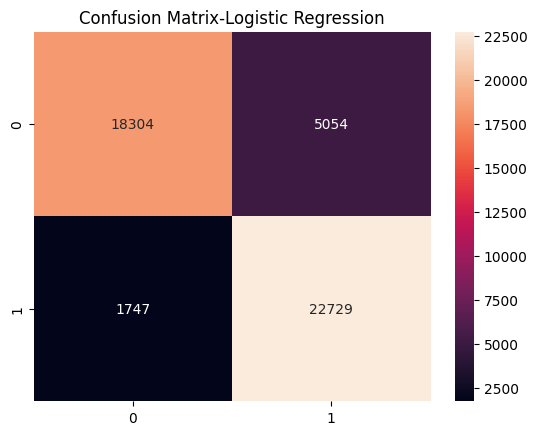

In [57]:
sns.heatmap(confusion_matrix(y_test,predict_log),annot=True,fmt='') 
plt.title('Confusion Matrix-Logistic Regression')

In [58]:
print(f'Accuracy Score of Logistic Regression Classifier from confusion matrix: {np.diag(confusion_matrix(y_test,predict_log)).sum() / confusion_matrix(y_test,predict_log).sum() * 100}')

Accuracy Score of Logistic Regression Classifier from confusion matrix: 85.7820796922691


In [59]:
print('Accuracy Score of Logistic Regression Classifier: {:.2f}'.format(accuracy_score(y_test,predict_log)))

Accuracy Score of Logistic Regression Classifier: 0.86


In [60]:
precision_scores = precision_score(y_test,predict_log)
print(f'Precision Score of Logistic Regression Classifier: {precision_scores}')

Precision Score of Logistic Regression Classifier: 0.81809019904258


In [61]:
recall_scores = recall_score(y_test,predict_log)
print(f'Recall Score of Logistic Regression Classifier: {recall_scores}')

Recall Score of Logistic Regression Classifier: 0.9286239581630985


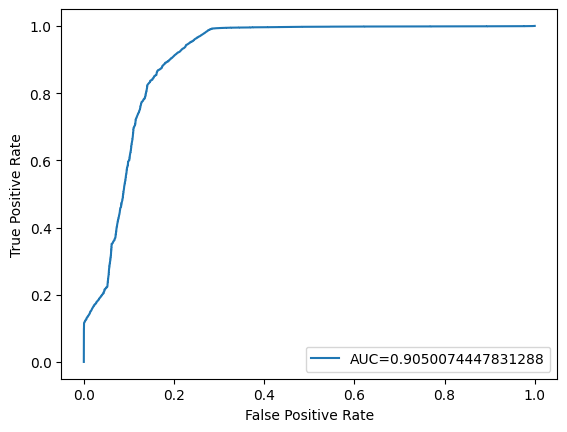

In [62]:
#define metrics
y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model Building: Ensemble

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
X.head()

,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,890,0,0,0,0,0,0,1,1,2,7,6
1,28794,0,1,0,0,0,0,1,1,2,7,6
2,49953,0,1,0,0,0,0,1,1,2,7,6
3,7133,0,1,0,0,0,0,1,1,2,7,6
4,20100,0,1,0,0,0,0,1,1,2,7,6


In [65]:
y.value_counts(normalize=True)

1    0.512164
0    0.487836
Name: target, dtype: float64

In [66]:
print('Shape of X_Train: {}'.format(X_train.shape))
print('Shape of X_Test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))


Shape of X_Train: (111611, 12)
Shape of X_Test: (47834, 12)
Shape of y_train: (111611,)
Shape of y_test: (47834,)


In [67]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
rf_predict = rf.predict(X_test)

In [69]:
accuracy_score(y_test,rf_predict)

0.8394656520466613

In [70]:
def clf_eval_metrics(y_test,y_pred):

    accuracy_scores = accuracy_score(y_test,y_pred)
    precision_scores = precision_score(y_test,y_pred)
    recall_scores = recall_score(y_test,y_pred)
    
    print('Accuracy Score of Logistic Regression Classifier: {:.2f}'.format(accuracy_scores))
    print(f'Precision Score of Logistic Regression Classifier: {precision_scores}')
    print(f'Recall Score of Logistic Regression Classifier: {recall_scores}')



# Evaluation metrics for Random Forest
clf_eval_metrics(y_test,rf_predict)

Accuracy Score of Logistic Regression Classifier: 0.84
Precision Score of Logistic Regression Classifier: 0.836545782408335
Recall Score of Logistic Regression Classifier: 0.8529171433240725


## Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for each model
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Define the models to train and their parameter grids
models = {
    'Random Forest': (RandomForestClassifier(), rf_param_grid),
    'Logistic Regression': (LogisticRegression(), lr_param_grid)
}

# Loop through each model and perform GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Training {model_name}...')
    clf = GridSearchCV(model, param_grid, cv=5)
    clf.fit(X_train, y_train)
    print(f'Best parameters: {clf.best_params_}')
    print(f'Train accuracy: {clf.best_score_}')
    print(f'Test accuracy: {clf.score(X_test, y_test)}')
    print('\n')


Training Random Forest...
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Train accuracy: 0.8712582053415268
Test accuracy: 0.8731237195300414


Training Logistic Regression...
Best parameters: {'C': 1, 'penalty': 'l2'}
Train accuracy: 0.8569047852443964
Test accuracy: 0.857820796922691


